<a href="https://colab.research.google.com/github/Abhishek-Bhardwaj-AB/Fashion-Mnist/blob/main/Assignment_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install TensorFlow

In [2]:
#Importing Packages

import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

Training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels:

    

```
Label    Description

  0.      T-shirt/top
  1.      Trouser
  2.      Pullover
  3.      Dress
  4.      Coat
  5.      Sandal
  6.      Shirt
  7.      Sneaker
  8.      Bag
  9.      Ankle boot
```



In [3]:
#Loading Dataset

from keras.datasets import fashion_mnist
(train_image, train_lab), (test_image, test_lab) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Explore Data

In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
len(train_lab)

60000

In [7]:
train_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_image.shape

(10000, 28, 28)

In [9]:
len(test_lab)

10000

In [10]:
test_lab

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

<Figure size 432x288 with 0 Axes>

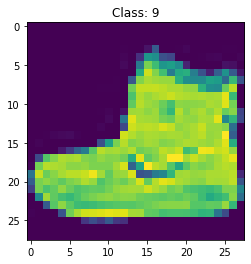

<Figure size 432x288 with 0 Axes>

In [11]:
#Preprocess the data

plt.imshow(train_image[0])
plt.title('Class: {}'.format(train_lab[0]))
plt.figure()

<Figure size 432x288 with 0 Axes>

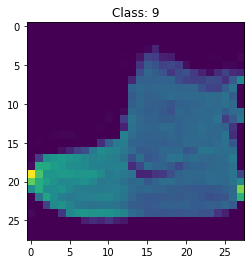

<Figure size 432x288 with 0 Axes>

In [12]:
# Normalizing the Data

train_image = tf.keras.utils.normalize(train_image, axis = 1)
test_image = tf.keras.utils.normalize(test_image, axis = 1)
plt.imshow(train_image[0])
plt.title('Class: {}'.format(train_lab[0]))
plt.figure()

In [13]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compiling the Model
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

# Fitting the Model
model.fit(train_image, train_lab, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 19s 3ms/step - loss: 0.6464 - accuracy: 0.7743
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8634
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.8794
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2956 - accuracy: 0.8903
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.8966
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2616 - accuracy: 0.9023
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2415 - accuracy: 0.9093
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2364 - accuracy: 0.9099
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2273 - accuracy: 0.9132
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.21

In [14]:
# Evaluating on the Test Data
model.evaluate(test_image, test_lab)

313/313 [==============================] - 1s 1ms/step - loss: 0.3635 - accuracy: 0.8881


[0.36346811056137085, 0.8881000280380249]

In [15]:
# Predict the first 10 images, Probability Distribution
p = model.predict(test_image[:10])
print(p)

[[2.16345395e-08 1.31906253e-18 3.75014776e-11 2.76056630e-13
  2.73841626e-12 1.10134840e-06 1.22189574e-08 2.68927888e-05
  2.67358462e-11 9.99971986e-01]
 [9.71130095e-04 2.49890157e-15 9.97587919e-01 2.70895611e-10
  1.13985653e-03 3.42920963e-08 3.01124790e-04 3.36313560e-10
  5.08358911e-09 1.02490505e-09]
 [2.84684893e-06 9.99996901e-01 3.88619092e-09 2.71319266e-07
  4.10881063e-09 2.88262925e-12 4.31135661e-08 1.88318938e-13
  9.94597252e-11 4.79188347e-12]
 [6.83607393e-09 9.99999881e-01 1.09942949e-11 6.90839315e-08
  3.57990332e-10 1.40686752e-15 6.71390721e-10 6.37056232e-16
  3.32690031e-16 3.47154976e-13]
 [9.11648750e-01 1.98734699e-14 1.77262962e-04 1.38068458e-06
  1.46981940e-04 2.07604245e-07 8.80253986e-02 2.99065842e-11
  1.05047047e-08 6.78744227e-10]
 [9.67156302e-06 9.99988794e-01 5.49289553e-07 1.44258479e-07
  6.88260741e-07 5.75775573e-11 1.83970002e-07 3.20936799e-13
  4.81289592e-11 8.76378844e-14]
 [2.13734623e-07 1.20753884e-12 1.63376704e-02 1.24446495e

In [16]:
pred = np.argmax(p, axis=1)
print(pred)
print(test_lab[:10])

[9 2 1 1 0 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [17]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

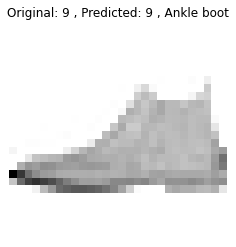

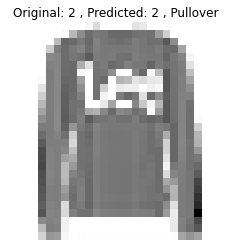

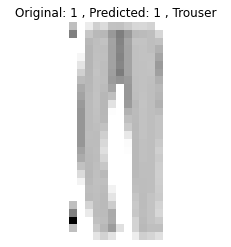

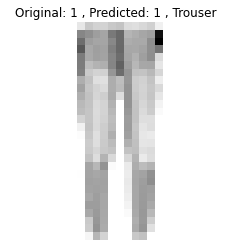

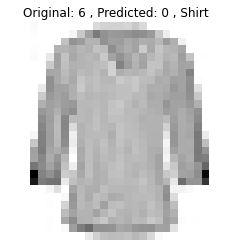

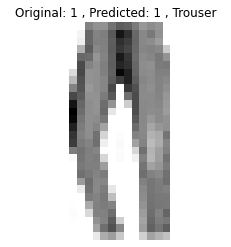

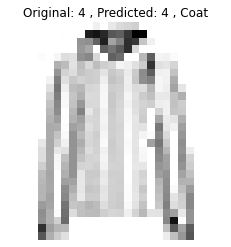

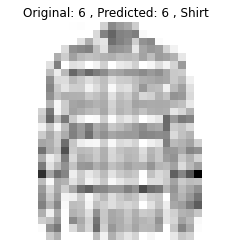

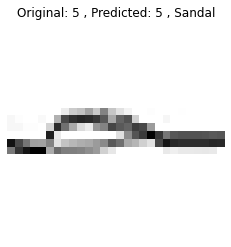

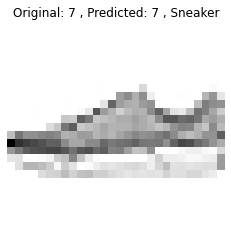

<Figure size 432x288 with 0 Axes>

In [18]:
# Visualizing the result
for i in range(10):
  plt.imshow(test_image[i], cmap="binary")
  plt.title('Original: {} , Predicted: {} , {}'.format(test_lab[i], pred[i],class_names[test_lab[i]]))
  plt.axis("off")
  plt.figure()

In [19]:
model.save('model')
model.save_weights('model.h5')

INFO:tensorflow:Assets written to: model/assets


In [20]:
model1 = keras.models.load_model('model')
model1.load_weights('model.h5')

In [21]:
pred = np.argmax(model1.predict(test_image[0].reshape(1,-1)))
pred

9